In [44]:
asd = ["                stochastic.processes.continuous.BesselProcess(dim = int(random_numbers[i]*9 + 1))", #  Bessel process of order 1 to 10
"                stochastic.processes.continuous.BrownianBridge()",
"                stochastic.processes.continuous.BrownianExcursion()",
"                stochastic.processes.continuous.BrownianMeander()",
"                stochastic.processes.continuous.BrownianMotion()",
"                stochastic.processes.continuous.CauchyProcess()", #
"                stochastic.processes.continuous.FractionalBrownianMotion(hurst = random_numbers[i]*0.98 + 0.01)", # Hurst parameter between 0.01 and 0.99
"                stochastic.processes.continuous.GammaProcess(mean = 5, variance=2.5)", #
"                stochastic.processes.continuous.GeometricBrownianMotion(drift = 2*random_numbers[i], volatility= 1*random_numbers2[i]+0.5)", #
"                stochastic.processes.continuous.InverseGaussianProcess()", #
"                stochastic.processes.continuous.MixedPoissonProcess(rate_func = lambda: 100)", #
"                # stochastic.processes.continuous.MultifractionalBrownianMotion(hurst = lambda x: (np.sin((random_numbers[i]*18 + 2)*x)**2)*0.98+ 0.01)", #er god nok()", men langsom #
"                stochastic.processes.continuous.PoissonProcess()", #
"                stochastic.processes.continuous.SquaredBesselProcess(dim = int(random_numbers[i]*9 + 1))", #
"                stochastic.processes.continuous.VarianceGammaProcess(drift = 2*random_numbers[i], variance = 0.01, scale = 100)", #
"                stochastic.processes.continuous.WienerProcess()",
"                #Diffusion models",
"                DiffusionProcess(speed=10*random_numbers[i], mean=0, vol=10*random_numbers[i])",
"                ConstantElasticityVarianceProcess(drift = 1, vol=10*random_numbers[i])",
"                CoxIngersollRossProcess(speed=10*random_numbers[i], mean=0, vol=10*random_numbers[i])",
"                OrnsteinUhlenbeckProcess(speed=10*random_numbers[i], vol=10*random_numbers[i])",
"                VasicekProcess(speed=10*random_numbers[i], mean=0, vol=10*random_numbers[i])",
"                stochastic.processes.noise.GaussianNoise()",
"                stochastic.processes.noise.FractionalGaussianNoise(hurst = random_numbers[i]*0.98 + 0.01)",
"                # Colored noise",
"                stochastic.processes.noise.BlueNoise()",
"                stochastic.processes.noise.BrownianNoise()",
"                stochastic.processes.noise.ColoredNoise()",
"                stochastic.processes.noise.RedNoise()",
"                stochastic.processes.noise.PinkNoise()",
"                stochastic.processes.noise.VioletNoise()",
"                stochastic.processes.noise.WhiteNoise()"]

In [45]:
args = [asd[i][asd[i].find("("):][1:-1] for i in range(len(asd)) if not "#" in asd[i]]

In [46]:
import numpy as np
# from stochastic.processes.diffusion import DiffusionProcess
                # ConstantElasticityVarianceProcess
                # CoxIngersollRossProcess
                # OrnsteinUhlenbeckProcess
                # VasicekProcess



In [47]:
import stochastic
from stochastic.processes.diffusion import *


def ContinousStocastichProcess(amplitude: float = 5, 
                               center: float = 7.5, 
                               samples_per_bunch: int = 5_000, 
                               processes = []
                               ):
    '''
    Generates a list of stochastic processes and returns them as a numpy array.
    The processes are scaled to fit the DAQ.
    '''
    values = np.zeros((len(processes), samples_per_bunch), dtype=np.float64)
    for j in range(len(processes)):
        try:
            samples = processes[j].sample(samples_per_bunch)[:samples_per_bunch]
            scaled = (samples - np.min(samples))
            scaled = amplitude*scaled/np.max(scaled) - amplitude/2 + center
            values[j] = scaled
        except Exception as e:
            print(e)
            
    return values


def processes(sr, duration, samples_per_frame):
    different_distributions = int(sr*duration/samples_per_frame)
    # random_numbers = np.random.uniform(0, 1, different_distributions+1)
    # random_numbers2 = np.random.uniform(0, 1, different_distributions+1)
    # # random_numbers3 = np.random.uniform(0, 1, different_distributions+1)
    random_numbers = np.ones(different_distributions+1)*1/2
    random_numbers2 = np.ones(different_distributions+1)*1/2
    for i in range(different_distributions+1):
        yield np.array([
                #Continuous time processes
                stochastic.processes.continuous.BesselProcess(int(random_numbers[i]*9 + 1)), #  Bessel process of order 1 to 10
                stochastic.processes.continuous.BrownianBridge(),
                stochastic.processes.continuous.BrownianExcursion(),
                stochastic.processes.continuous.BrownianMeander(),
                stochastic.processes.continuous.BrownianMotion(),
                stochastic.processes.continuous.CauchyProcess(), #
                stochastic.processes.continuous.FractionalBrownianMotion(random_numbers[i]*0.98 + 0.01), # Hurst parameter between 0.01 and 0.99
                stochastic.processes.continuous.GammaProcess(mean = 5, variance=2.5), #
                stochastic.processes.continuous.GeometricBrownianMotion(drift = 2*random_numbers[i], volatility= 1*random_numbers2[i]+0.5), #
                stochastic.processes.continuous.InverseGaussianProcess(), #
                stochastic.processes.continuous.MixedPoissonProcess(lambda: 100), #
                ## A multifractional Brownian motion generalizes a fractional Brownian motion 
                ## with a Hurst parameter which is a function of time.
                ## hurst oscillating 
                # stochastic.processes.continuous.MultifractionalBrownianMotion(hurst = lambda x: (np.sin((random_numbers[i]*18 + 2)*x)**2)*0.98+ 0.01), #er god nok(), men langsom #
                stochastic.processes.continuous.PoissonProcess(), #
                stochastic.processes.continuous.SquaredBesselProcess(int(random_numbers[i]*9 + 1)), #
                stochastic.processes.continuous.VarianceGammaProcess(drift = 2*random_numbers[i], variance = 0.01, scale = 100), #
                stochastic.processes.continuous.WienerProcess(),
                #Diffusion models
                DiffusionProcess(speed=10*random_numbers[i], mean=0, vol=10*random_numbers[i], volexp=0, t=1, rng=None),
                ConstantElasticityVarianceProcess(drift = 1, vol=10*random_numbers[i], volexp=0),
                CoxIngersollRossProcess(speed=10*random_numbers[i], mean=0, vol=10*random_numbers[i]),
                OrnsteinUhlenbeckProcess(speed=10*random_numbers[i], vol=10*random_numbers[i]),
                VasicekProcess(speed=10*random_numbers[i], mean=0, vol=10*random_numbers[i]),
                stochastic.processes.noise.GaussianNoise(),
                stochastic.processes.noise.FractionalGaussianNoise(random_numbers[i]*0.98 + 0.01),
                # Colored noise
                stochastic.processes.noise.BlueNoise(),
                stochastic.processes.noise.BrownianNoise(),
                stochastic.processes.noise.ColoredNoise(),
                stochastic.processes.noise.RedNoise(),
                stochastic.processes.noise.PinkNoise(),
                stochastic.processes.noise.VioletNoise(),
                stochastic.processes.noise.WhiteNoise()
            ])


In [48]:
random_numbers = np.ones(1+1)*1/2
i = 0
fda = DiffusionProcess(speed=10*random_numbers[i], mean=0, vol=10*random_numbers[i])
fda.sample(1)

array([ 1.        , -7.52980826])

In [49]:
process_arr = next(processes(sr = 1, duration = 1, samples_per_frame = 1))
nr_of_processes = len(process_arr)
keys = np.zeros((nr_of_processes,), dtype='<U64')
for i in range(nr_of_processes):
    keys[i] = process_arr[i].__doc__.split('.')[0]


In [50]:
import pandas as pd

In [51]:
"".join(["\texttt{"+arg+"}, \\ " for arg in args[8].split(",")])

'\texttt{drift = 2*random_numbers[i]}, \\ \texttt{ volatility= 1*random_numbers2[i]+0.5}, \\ '

In [52]:
def multirow(arg):
    
    arg = r"\begin{tabular}[c]{@{}l@{}}" + "".join(["\\texttt{"+a+"}, \\\\ " for a in arg.split(",")]) + r" \end{tabular}" if "," in arg else "\\texttt{"+arg+"}"
    return arg

In [53]:
args = ["\\texttt{"+arg+"}" if arg != "" else "no arguments given" for arg in args]


In [54]:
args

['\\texttt{dim = int(random_numbers[i]*9 + 1)}',
 'no arguments given',
 'no arguments given',
 'no arguments given',
 'no arguments given',
 'no arguments given',
 '\\texttt{hurst = random_numbers[i]*0.98 + 0.01}',
 '\\texttt{mean = 5, variance=2.5}',
 '\\texttt{drift = 2*random_numbers[i], volatility= 1*random_numbers2[i]+0.5}',
 'no arguments given',
 '\\texttt{rate_func = lambda: 100}',
 'no arguments given',
 '\\texttt{dim = int(random_numbers[i]*9 + 1)}',
 '\\texttt{drift = 2*random_numbers[i], variance = 0.01, scale = 100}',
 'no arguments given',
 '\\texttt{speed=10*random_numbers[i], mean=0, vol=10*random_numbers[i]}',
 '\\texttt{drift = 1, vol=10*random_numbers[i]}',
 '\\texttt{speed=10*random_numbers[i], mean=0, vol=10*random_numbers[i]}',
 '\\texttt{speed=10*random_numbers[i], vol=10*random_numbers[i]}',
 '\\texttt{speed=10*random_numbers[i], mean=0, vol=10*random_numbers[i]}',
 'no arguments given',
 '\\texttt{hurst = random_numbers[i]*0.98 + 0.01}',
 'no arguments given',

In [55]:
args = [arg.replace("_", r"\_") for arg in args]

In [56]:
# [arg for arg in args if arg.startswith("\\texttt{")]

In [57]:
import pandas as pd

# Example DataFrame
data = {'Name': ['Alice', 'Bob', 'Charlie'], 'Age': [25, 30, 35]}
df = pd.DataFrame(data)

# Save the DataFrame to a pickle file
df.to_pickle('dataframe.pkl')

# Load the DataFrame back from the pickle file
loaded_df = pd.read_pickle('dataframe.pkl')

print(loaded_df)

      Name  Age
0    Alice   25
1      Bob   30
2  Charlie   35


In [58]:
import os
Git_Folder = os.path.dirname(os.path.dirname(os.getcwd()))
Git_Folder


'c:\\Users\\lorentsen\\Documents\\Bachelors-Project-Christian-Lorentsen'

In [59]:
os.listdir(os.path.join(Git_Folder, "Python", "ssh"))

['OU_var_mean.pkl',
 'Preprocessing.ipynb',
 'process_var_mean.csv',
 'process_var_mean.pkl']

In [60]:
varmean = pd.read_csv(os.path.join(Git_Folder, "Python", "ssh", "process_var_mean.csv"))
no_lockin = varmean[[x.endswith("ai1\'") for x in varmean["Unnamed: 0"]]]
onlyvarmean = no_lockin[no_lockin.columns.drop("Unnamed: 0")]
onlyvarmean.index = np.arange(29)
# onlyvarmean

In [61]:
df = pd.DataFrame()
df["Process"] = keys
df = df.join(onlyvarmean)
# df["mean"] = np.linspace(0, 1, 29)
# df["var"] = np.linspace(1, 0, 29)
df["Arguments given"] = args
columns=[('','Process'), ('Constant Parameters','varprocesses'), ('Constant Parameters','meanprocesses'), ('Random Parameters','vardiffent_process_params'), ('Random Parameters','meandiffent_process_params'), ('','Arguments given')]
df.columns=pd.MultiIndex.from_tuples(columns)
df = df.rename(columns={"varprocesses":"Variance", "meanprocesses": "Mean", "vardiffent_process_params": "Variance", "meandiffent_process_params": "Mean"})
# ", ".join(["(\'\',\'" + x + "\')" for x in list(df.columns)])
df

Constant Parameters            \
                                        Process            Variance      Mean   
0                                Bessel process        1.527796e+00  3.006026   
1                               Brownian bridge        1.399834e+00  2.496661   
2                            Brownian excursion        1.190198e+00  2.531751   
3                      Brownian meander process        1.556569e+00  2.519596   
4                               Brownian motion        1.513997e+00  2.394818   
5                      Symmetric Cauchy process        1.912678e+00  2.790139   
6            Fractional Brownian motion process        1.546028e+00  2.505201   
7                                 Gamma process        2.111184e+00  2.457027   
8             Geometric Brownian motion process        1.518729e+00  1.934390   
9                      Inverse Gaussian process        3.059300e+00  2.450711   
10                        Mixed poisson process        2.109675e+00  2.502044   
11                              Poisson process        2.091110e+00  2.497072   
12                       Squared Bessel process        2.008648e+00  2.230327   
13                       Variance Gamma process        1.760818e+00  2.379875   
14  Wiener process, or standard Brownian motion        1.289715e+00  2.541992   
15                Generalized diffusion process        1.048971e+00  2.488704   
16      Constant elasticity of variance process        1.882186e+00  2.593529   
17                   Cox-Ingersoll-Ross process        1.421816e-07  0.001308   
18                   Ornstein-Uhlenbeck process        1.320688e+00  2.612517   
19                              Vasicek process        1.195363e+00  2.550433   
20                       Gaussian noise process        4.309497e-01  2.593634   
21            Fractional Gaussian noise process        4.453995e-01  2.562901   
22                                   Blue noise        4.405222e-01  2.561422   
23                         Brownian (red) noise        1.245402e+00  2.447786   
24                      Colored noise processes        4.526000e-01  2.501837   
25                         Red (Brownian) noise        1.464769e+00  2.629690   
26                         Pink (flicker) noise        5.577821e-01  2.484074   
27                                 Violet noise        4.111003e-01  2.523588   
28                                  White noise        4.294757e-01  2.477161   

   Random Parameters            \
            Variance      Mean   
0           1.412264  2.885806   
1           1.289295  2.513374   
2           1.304825  2.675002   
3           1.373181  2.710061   
4           1.704849  2.629273   
5           3.425010  2.546948   
6           1.769581  2.718060   
7           2.219038  2.352464   
8           1.551816  1.707770   
9           2.447837  2.980048   
10          2.097976  2.505632   
11          2.098577  2.503438   
12          1.864128  2.007810   
13          1.822181  2.660253   
14          1.551059  2.483522   
15          1.147420  2.621280   
16          1.602027  2.653017   
17          1.290577  0.494154   
18          1.237427  2.602272   
19          1.194684  2.540704   
20          0.425258  2.599802   
21          0.438068  2.458153   
22          0.419188  2.467449   
23          1.336454  2.406496   
24          0.441463  2.437487   
25          1.158066  2.536500   
26          0.527334  2.457120   
27          0.416546  2.467329   
28          0.463334  2.531151   

                                                       
                                      Arguments given  
0        \texttt{dim = int(random\_numbers[i]*9 + 1)}  
1                                  no arguments given  
2                                  no arguments given  
3                                  no arguments given  
4                                  no arguments given  
5                                  no arguments given  
6     \texttt{hurst = random\_num

In [62]:
path_to_tex = os.path.join(Git_Folder, "67a9c89827d61417b921f8b8", "Tables", "Processes.tex")

# corr = Data.corr()

styler = df.style
      
(styler.background_gradient(cmap='YlOrRd', axis = 0))

styler.format(precision=3)
styler.to_latex(
    path_to_tex,
    # float_format="%.2f", 
    caption="Processes used for magnetic field profiles, including their mean, variance and arguments passed. The colormap is applied along the columns", 
    label="tab:process", 
    clines="skip-last;data",
    convert_css=True,
    position_float="centering",
    multicol_align="|c|",
    hrules=True,
    position="h!"
)

with open(path_to_tex, "r+") as f:
    # print(f.read())
    # print(f.read().replace("\\begin{tabular}", "\n\n\n"))
    text = f.read().replace("\\begin{tabular}{", "\\resizebox{\\textwidth}{!}{ \n \\begin{tabular}{")
    text = text.replace("\\end{tabular}\n", "\\end{tabular} \n}\n")
    # print(text)
    f.seek(0)
    f.write(text)
    f.close()
    
styler

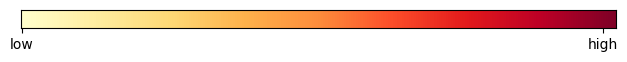

In [63]:
import matplotlib.pyplot as plt
# import numpy as np

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

nrows = 1
figh = 0.35 + 0.15 + (nrows + (nrows-1)*0.1)*0.22
fig, axs = plt.subplots(nrows=nrows, figsize=(6.4, figh))
fig.subplots_adjust(top=1-.35/figh, bottom=.15/figh, left=0.2, right=0.99)
axs.imshow(gradient, aspect='auto', cmap='YlOrRd')
axs.set_yticks([])
axs.set_xticks(ticks = [0, 250], labels = ["low", "high"])
fig.tight_layout()

path_to_fig = os.path.join(Git_Folder, "67a9c89827d61417b921f8b8", "Figures", "cmap.svg")
plt.savefig(path_to_fig)
